In [1]:
import pandas as pd
pd.options.plotting.backend = 'plotly'

In [2]:
data = pd.read_csv('transfusion.csv')

In [3]:
data.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [4]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# create the dash app
app = dash.Dash()

# create figures
fig = px.box(data, y='Monetary (c.c. blood)', 
                 title='Monetary (c.c. blood)')

# add components 
app.layout = html.Div([
    
    html.H1(children='Boston House Price Analysis'),
    
    dcc.Graph(figure=fig)
])

# run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

In [8]:
%%timeit
new_col_data = [data.iloc[i, 0] + data.iloc[i, 3] for i in data.index]
data['new_column_1'] = pd.Series(new_col_data)


37.3 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
data['Average Donations'] = data['Time (months)']/data['Frequency (times)']

In [23]:
%%timeit
data['new_column_2'] = data['Recency (months)'] + data['Time (months)']
data.head()

291 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%%timeit
data['new_column_3'] = data.apply(lambda row: row['Recency (months)'] 
                            + row['Time (months)'],axis=1)
data.head()

8.35 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
data["Average Donation Volume"].value_counts()

250.0    748
Name: Average Donation Volume, dtype: int64

<AxesSubplot:xlabel='Average Donations'>

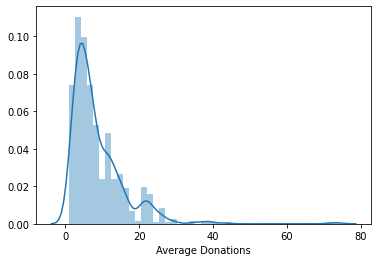

In [28]:
import seaborn as sns
sns.distplot(data["Average Donations"], norm_hist=True)

In [20]:
data.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
new_column                                    int64
new_column_1                                  int64
new_column_2                                  int64
new_column_3                                  int64
dtype: object

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

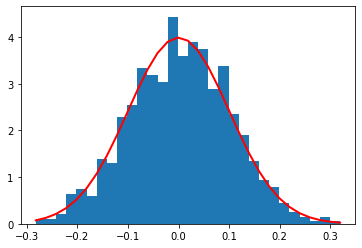

In [4]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [71]:
from sklearn.datasets import load_boston

X,y = load_boston(as_frame=True, return_X_y=True)
data_db = pd.concat([X,y], axis=1)
#data_db['target'] = y
#data = data.drop('class', axis=1)
data_db.head()

TypeError: load_boston() got an unexpected keyword argument 'as_frame'

In [48]:
data_db.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

<AxesSubplot:xlabel='petal width (cm)'>

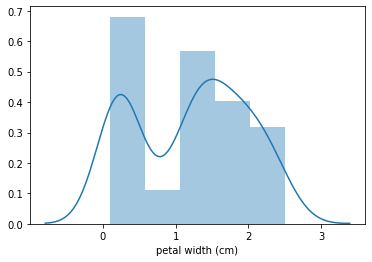

In [70]:
sns.distplot(data_db["petal width (cm)"], norm_hist=True)